In [1]:
%matplotlib inline
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden) # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)            # linear output
        return x

    
def Save_Network():
    net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
    print(net)  # net architecture

    optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
    loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

    for t in range(201):
        prediction = net(x)     # input x and predict based on x
        loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
        if t % 40 == 0:
            print('Iteration Number is %3d  and  loss is %.4f' % (t, loss.item()))
    
    # two ways to save the net
    torch.save(net, 'net_all.pkl')  # save entire net
    torch.save(net.state_dict(), 'net_params.pkl')   # save only the parameters

            
# def Restore_Network():
#     net2 = torch.load('net_all.pkl')
#     prediction = net2(x)
#     print(net2)
#     # plot result
#     plt.title('net2')
#     plt.scatter(x.data.numpy(), y.data.numpy())
#     plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    

# def Restore_Net_Para():
#     net3 = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
#     # copy net's parameters into net3
#     net3.load_state_dict(torch.load('net_params.pkl'))
#     prediction = net3(x)
#     print(net3)
#     # plot result
#     plt.title('net3')
#     plt.scatter(x.data.numpy(), y.data.numpy())
#     plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

In [2]:
# save net
Save_Network()

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)
Iteration Number is   0  and  loss is 0.6629
Iteration Number is  40  and  loss is 0.0422
Iteration Number is  80  and  loss is 0.0140
Iteration Number is 120  and  loss is 0.0085
Iteration Number is 160  and  loss is 0.0078
Iteration Number is 200  and  loss is 0.0074


Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


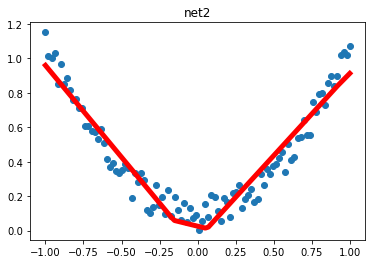

In [3]:
# restore entire net
# Restore_Network()
net2 = torch.load('net_all.pkl')
prediction = net2(x)
print(net2)
# plot result
plt.title('net2')
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


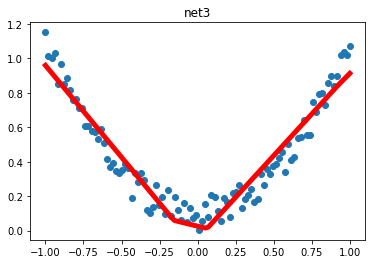

In [4]:
# restore only the net parameters
# Restore_Net_Para()
net3 = Net(n_feature=1, n_hidden=10, n_output=1) # define the network
# copy net's parameters into net3
net3.load_state_dict(torch.load('net_params.pkl'))
prediction = net3(x)
print(net3)
# plot result
plt.title('net3')
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)